In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the data
data = pd.read_csv('C:\\Users\\malki\\Downloads\\CodersCave\\Week 3\\data\\employee_review_mturk_dataset_test_v6_kaggle.csv')


In [3]:
# Data Cleaning and Understanding
print(data.head())  # Display the first few rows
print(data.info())  # Get information about the data

# Handle missing values 
print(data.isnull().sum())  # Check for missing values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values
print(data.duplicated().sum())

      id   person_name                                  nine_box_category  \
0  20051  Lacey Howard  Category 1: 'Risk' (Low performance, Low poten...   
1  20057     Amy Jones  Category 1: 'Risk' (Low performance, Low poten...   
2  20058     Amy Jones  Category 1: 'Risk' (Low performance, Low poten...   
3  20059     Amy Jones  Category 1: 'Risk' (Low performance, Low poten...   
4  20060     Amy Jones  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  updated  reviewed  
0  Lacey's performance has been sub standard in t...     True      True  
1  Amy struggles at her work a lot. Shes always o...     True      True  
2  Amy Jones is a nice person and she is dedicate...     True      True  
3  Amy Jones needs to become a better player. She...     True      True  
4  Amy is able to focus on the task at hand only ...     True      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6

C:\Users\malki\AppData\Local\Temp\ipykernel_36088\78711984.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


C:\Users\malki\AppData\Local\Temp\ipykernel_36088\3795188066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')


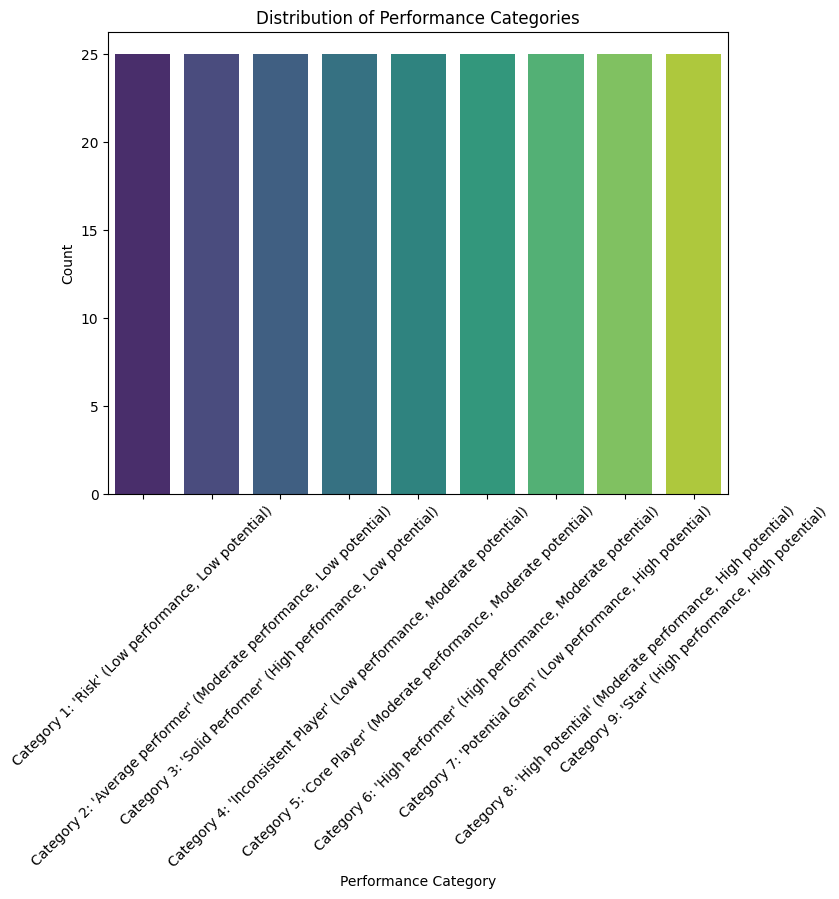

In [4]:
# Analyze Performance Categories
performance_counts = data['nine_box_category'].value_counts()

# Visualize performance category distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')
plt.title('Distribution of Performance Categories')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. Category Dominance: The most prevalent category is Category 5: 'Core Player' (Moderate performance, Moderate potential), indicating a balanced mix of performance and potential.
   
2. Category Distribution: There are fewer individuals in lower categories (Risk, Average performer, Inconsistent Player) and higher categories (Potential Gem, High Potential, Star), suggesting a diverse range of performance and potential levels.
   
3. Category Balance: The distribution is relatively balanced, with a gradual decrease in frequency from Category 5 to the higher and lower categories.

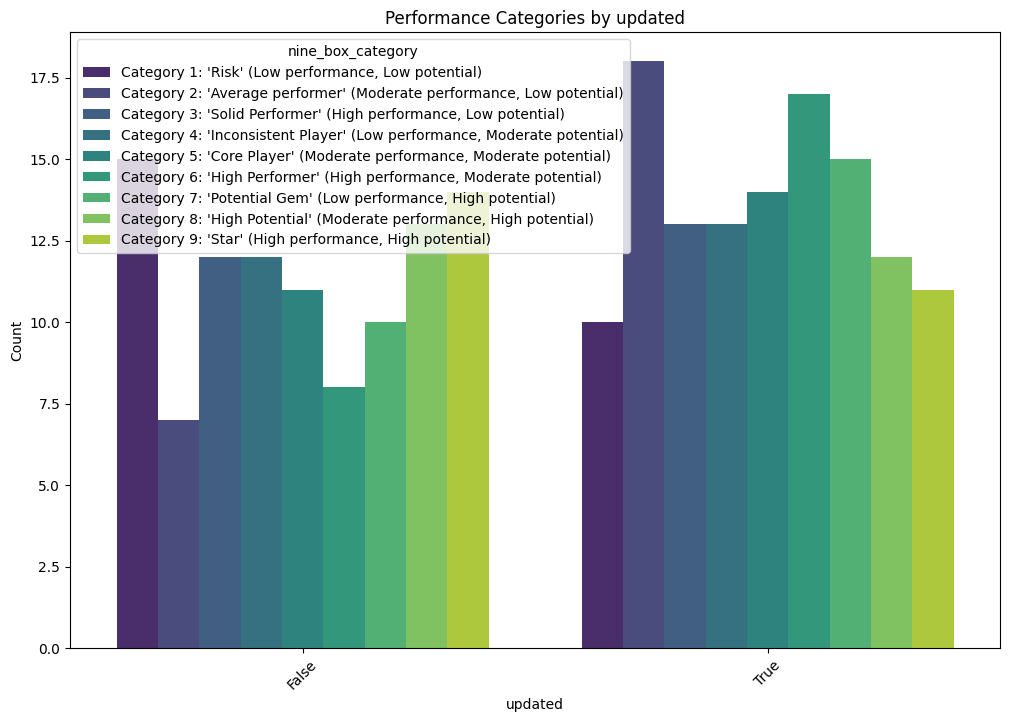

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x='updated', hue='nine_box_category', data=data, palette='viridis')
plt.title('Performance Categories by updated')
plt.xlabel('updated')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. Category 5 Dominance: Category 5 ('Core Player') remains the most prevalent category.
   
2. Category Differences: The "True" and "False" categories have distinct distributions, indicating different characteristics or behaviors.
   
3. Targeted Interventions: Implement interventions tailored to the specific needs of individuals within each category.
   
4. Further Analysis: Explore correlations and conduct case studies to gain deeper insights.

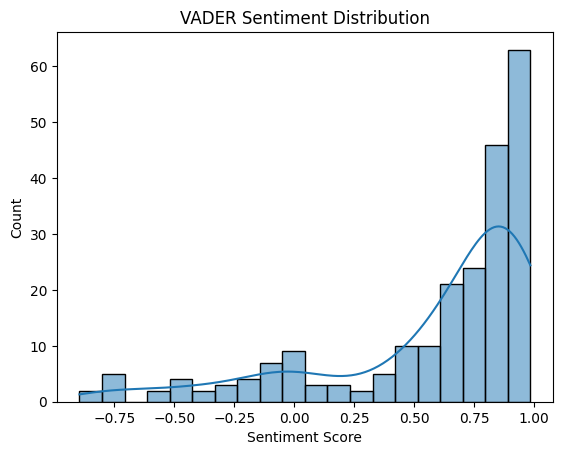

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
data['sentiment_vader'] = data['feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize the sentiment distribution using VADER
sns.histplot(data['sentiment_vader'], bins=20, kde=True)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


1. Positive Sentiment: The distribution is skewed to the right, indicating a majority of positive feedback.
   
2. High Positive Sentiment: A significant number of feedback entries have a relatively high positive sentiment.
   
3. Fewer Negative Sentiments: There are fewer feedback entries with negative sentiment.
   
4. Further Analysis: Analyze sentiment by category, over time, and through textual analysis.

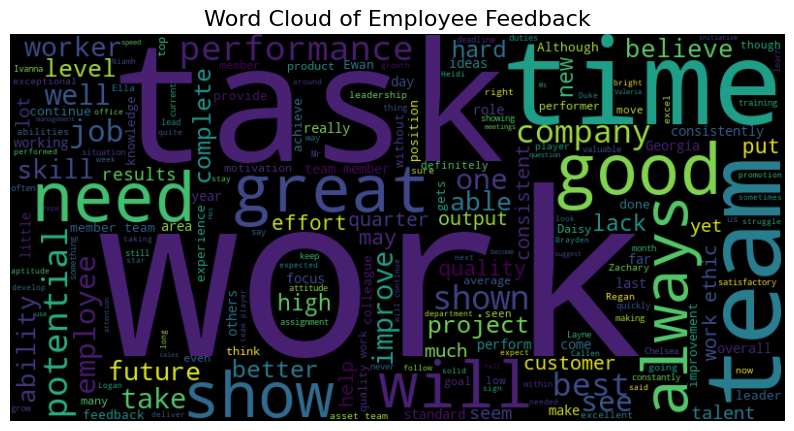

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming you have already generated the word cloud as follows:
stopwords = set(STOPWORDS)
text_cleaned = " ".join(data['feedback'].apply(lambda x: " ".join([word for word in x.split() if word.lower() not in stopwords])))

wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text_cleaned)

# Plot the word cloud
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Word Cloud of Employee Feedback', fontsize=16)  # Optional: Add a title
plt.show()


1. Frequent Topics: Work, task, time, performance, and great are frequently discussed.
2. Positive Sentiment: Words like great, good, and better indicate positive sentiment.
3. Work-Related Themes: Work, performance, and skill are prominent, highlighting work-related issues.
4. Leadership and Teamwork: Leadership and teamwork are important aspects of the employee experience.
5. Professional Development: Employees desire opportunities for professional development.

In [8]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded and cleaned

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate sentiment for each feedback entry
data['sentiment'] = data['feedback'].apply(get_sentiment)

# Calculate word count for each feedback entry
data['word_count'] = data['feedback'].apply(lambda x: len(x.split()))

# Group feedback by individual and calculate mean sentiment and total word count
individual_metrics = data.groupby('person_name').agg({
    'feedback': 'count',
    'sentiment': 'mean',
    'word_count': 'sum'
}).reset_index()

# Rename columns for clarity
individual_metrics.columns = ['person_name', 'feedback_count', 'avg_sentiment', 'total_word_count']

# Display the calculated metrics
print(individual_metrics.head())


         person_name  feedback_count  avg_sentiment  total_word_count
0        Alisa Stark               4       0.086721               217
1        Allan Logan               3       0.319213               124
2          Amy Jones               5       0.232238               245
3       Andrew Grant               4       0.246152               251
4  Angelica Peterson               1       0.400000                63


C:\Users\malki\AppData\Local\Temp\ipykernel_36088\4265619032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_name', y='avg_sentiment', data=individual_metrics, palette='coolwarm')


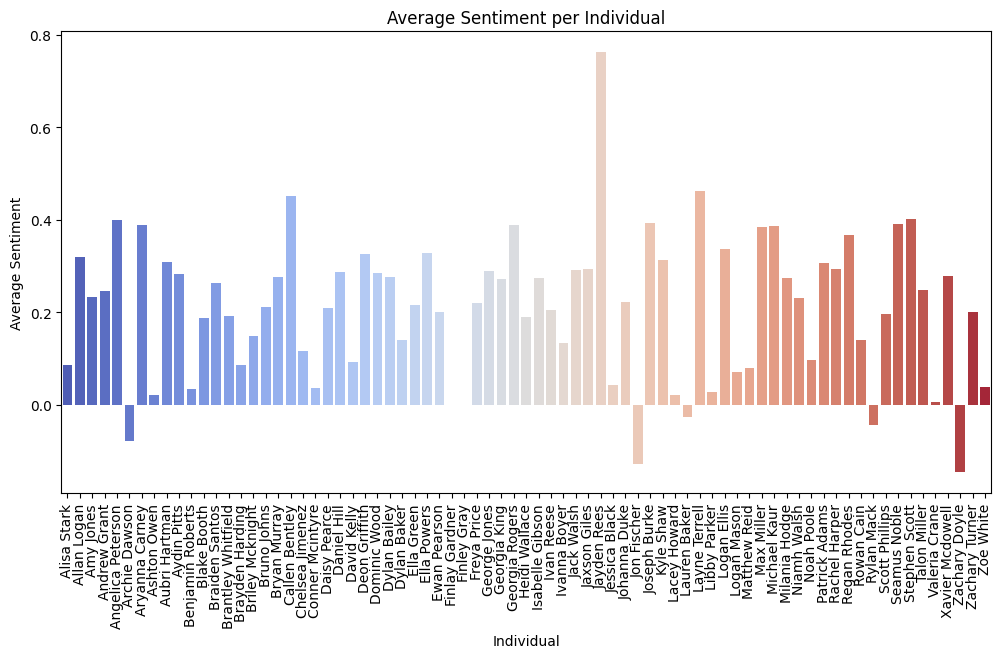

In [9]:
# Plotting average sentiment per individual
plt.figure(figsize=(12, 6))
sns.barplot(x='person_name', y='avg_sentiment', data=individual_metrics, palette='coolwarm')
plt.title('Average Sentiment per Individual')
plt.xlabel('Individual')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



C:\Users\malki\AppData\Local\Temp\ipykernel_36088\4234319808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_name', y='total_word_count', data=individual_metrics, palette='viridis')


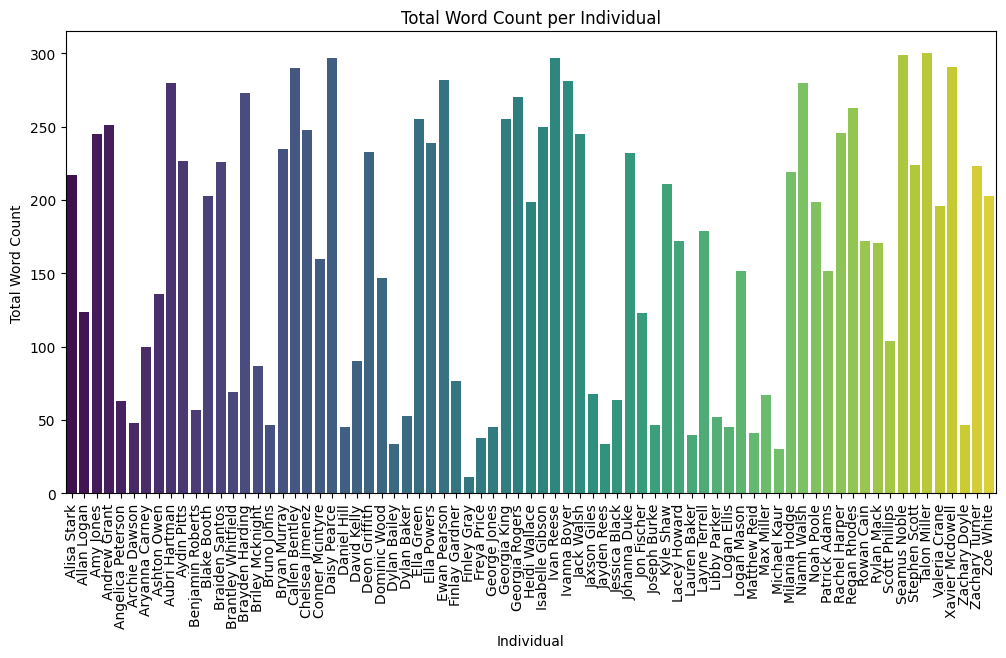

C:\Users\malki\AppData\Local\Temp\ipykernel_36088\4234319808.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_name', y='feedback_count', data=individual_metrics, palette='Blues')


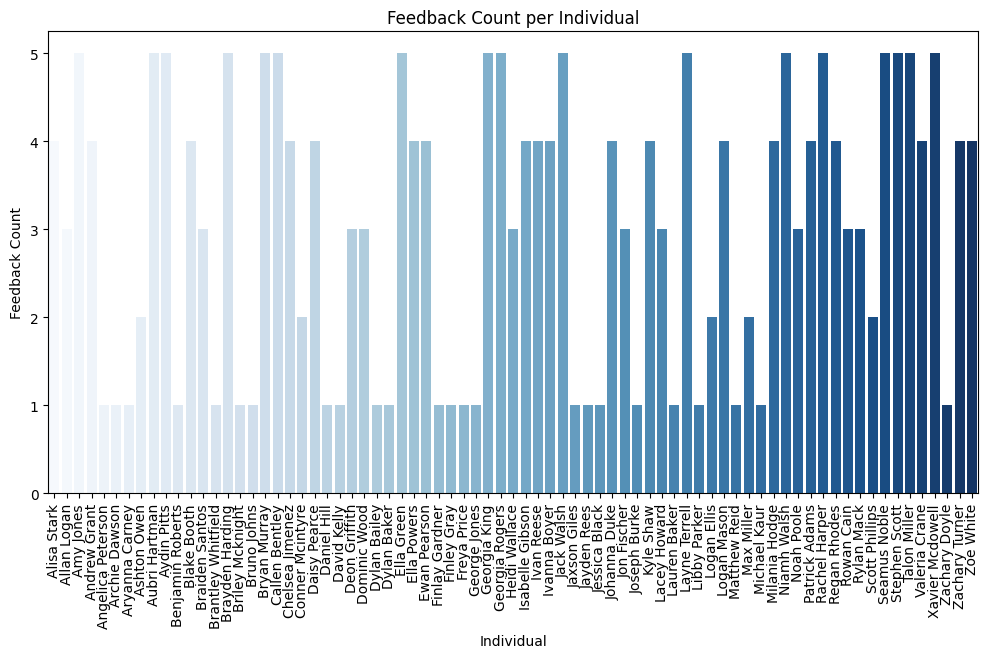

In [10]:
# Plotting total word count per individual
plt.figure(figsize=(12, 6))
sns.barplot(x='person_name', y='total_word_count', data=individual_metrics, palette='viridis')
plt.title('Total Word Count per Individual')
plt.xlabel('Individual')
plt.ylabel('Total Word Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Plotting feedback count per individual
plt.figure(figsize=(12, 6))
sns.barplot(x='person_name', y='feedback_count', data=individual_metrics, palette='Blues')
plt.title('Feedback Count per Individual')
plt.xlabel('Individual')
plt.ylabel('Feedback Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


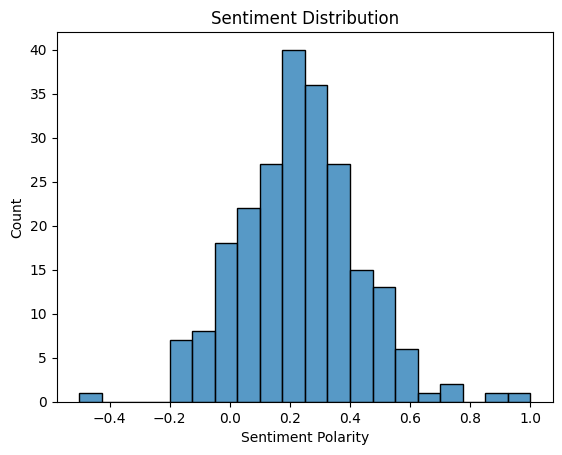

In [11]:
# Analyze Feedback Sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['sentiment'] = data['feedback'].apply(get_sentiment)

# Analyze sentiment distribution
sns.histplot(data['sentiment'], bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    sentiment_by_time = data.resample('M', on='date').mean()['sentiment']
    
    plt.figure(figsize=(10, 6))  # Explicitly create a new figure with a specified size
    sentiment_by_time.plot()
    plt.title('Average Sentiment Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Sentiment')
    plt.grid(True)  
    plt.show()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>